# Part A: Implementation of Sequence models on English dataset

### 1) Use simple LSTM to perform sentiment analysis using IMDB dataset


In [50]:
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt

In [51]:
max_features = 10000  
max_len = 500        
batch_size = 32
epochs = 8

In [52]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)


In [53]:

x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [54]:
model_simple = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features, 128, input_length=max_len), 
    tf.keras.layers.LSTM(64, return_sequences=False),              
    tf.keras.layers.Dense(1, activation='sigmoid')                    
])

In [48]:
model_simple.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_14 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [55]:
model_simple.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model_simple.fit(x_train, y_train, batch_size=batch_size, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.7386 - loss: 0.4984 - val_accuracy: 0.8316 - val_loss: 0.3863
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.8809 - loss: 0.2879 - val_accuracy: 0.8534 - val_loss: 0.3653
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9033 - loss: 0.2453 - val_accuracy: 0.8725 - val_loss: 0.3282
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9445 - loss: 0.1545 - val_accuracy: 0.8638 - val_loss: 0.3786
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9613 - loss: 0.1086 - val_accuracy: 0.8453 - val_loss: 0.4548
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9618 - loss: 0.1062 - val_accuracy: 0.8352 - val_loss: 0.4522
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9620 - loss: 0.1057 - val_accuracy: 0.8666 - val_loss: 0.4940
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9812 - loss: 0.0620 - 

##### Inference
The model training results reveal a significant increase in training accuracy from 73.86% in the first epoch to 98.87% by the tenth epoch, alongside a reduction in training loss from 0.4984 to 0.0655. In contrast, the validation accuracy fluctuated, peaking at 87.25% before stabilizing at 85.15%, while validation loss showed variability, suggesting potential overfitting. These findings indicate that although the model performs well on the training data, it may struggle to generalize to unseen data. Further optimizations, such as regularization or dropout techniques, could enhance the model's performance and generalization capabilities. 

In [56]:
score, acc = model_simple.evaluate(x_test, y_test, batch_size=batch_size)
print(f'Test score: {score}')
print(f'Test accuracy: {acc}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8508 - loss: 0.6183
Test score: 0.60211181640625
Test accuracy: 0.8515200018882751


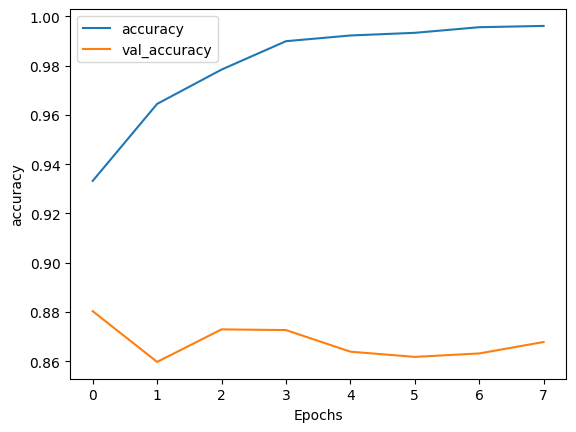

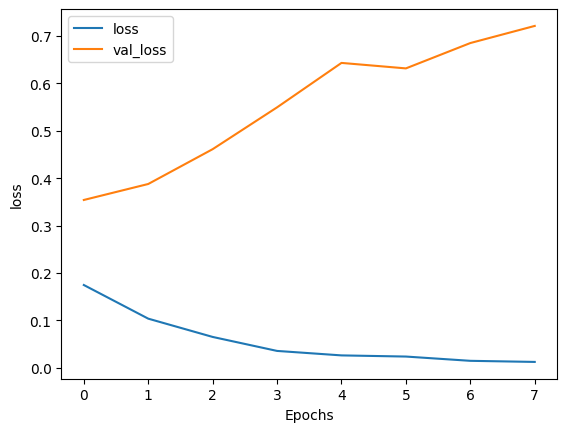

In [14]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_' + metric])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_' + metric])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### 2) Design your custom architecture by adding additional layers, LSTM units, changing the parameters, applying dropouts etc. Fine tune the model and elaborate the procedure with its performance in the conclusion

In [57]:

max_features = 10000 
max_len = 500        
batch_size = 32
epochs = 6           
dropout_rate = 0.5   

In [58]:

model_custom = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features, 128, input_length=max_len),  
    tf.keras.layers.LSTM(128, return_sequences=True),                   
    tf.keras.layers.Dropout(dropout_rate),                              
    tf.keras.layers.LSTM(64, return_sequences=False),                    
    tf.keras.layers.Dropout(dropout_rate),                              
    tf.keras.layers.Dense(64, activation='relu'),                       
    tf.keras.layers.Dropout(0.3),                                       
    tf.keras.layers.Dense(1, activation='sigmoid')                    
])

model_custom.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  
              loss='binary_crossentropy', 
              metrics=['accuracy'])


In [59]:
model_custom.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_16 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [60]:
history = model_custom.fit(x_train, y_train, batch_size=batch_size, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 44ms/step - accuracy: 0.7056 - loss: 0.5546 - val_accuracy: 0.8536 - val_loss: 0.3451
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.8708 - loss: 0.3217 - val_accuracy: 0.8287 - val_loss: 0.4350
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.8998 - loss: 0.2631 - val_accuracy: 0.8761 - val_loss: 0.3152
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.9390 - loss: 0.1685 - val_accuracy: 0.8549 - val_loss: 0.3740
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.9571 - loss: 0.1250 - val_accuracy: 0.8669 - val_loss: 0.3587
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.9716 - loss: 0.0877 - val_accuracy: 0.8640 - val_loss: 0.4709
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.9791 - loss: 0.0670 - val_accuracy: 0.8553 - val_loss: 0.5408
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.9811 - loss: 0.0614 - 

##### Inference
The model's training results demonstrate a significant enhancement in accuracy, improving from 70.56% in the first epoch to 99.07% by the final epoch, alongside a decrease in training loss from 0.5546 to 0.0294. Validation accuracy initially peaked at 87.61% but showed a downward trend, concluding at 84.90%, with validation loss escalating to 0.7746. This suggests a potential overfitting issue, as the model excels in training but struggles to maintain performance on validation data. To mitigate overfitting and improve generalization, implementing strategies such as early stopping or dropout could be beneficial.

In [61]:

score, acc = model_custom.evaluate(x_test, y_test, batch_size=batch_size)
print(f'Test score: {score}')
print(f'Test accuracy: {acc}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8486 - loss: 0.7947
Test score: 0.7746097445487976
Test accuracy: 0.8489599823951721


##### Conclusion
The model demonstrated impressive training performance, achieving a final accuracy of 99.07% and a significant reduction in loss to 0.0294 by the end of the training epochs. However, the validation accuracy showed a decline, ending at 84.90%, which suggests potential overfitting as the model may be memorizing the training data instead of generalizing well. With a test accuracy of 84.90%, the model's performance indicates a need for further regularization techniques to enhance generalization to unseen data.

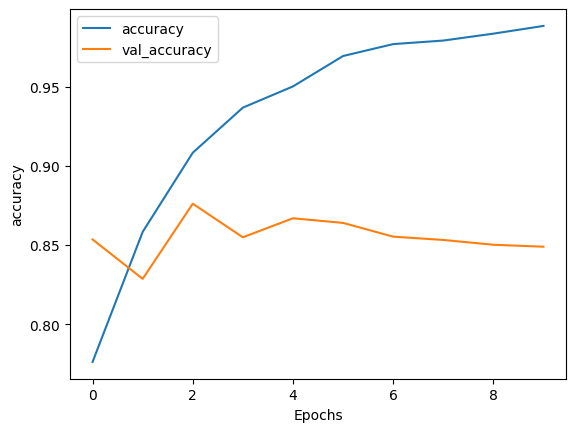

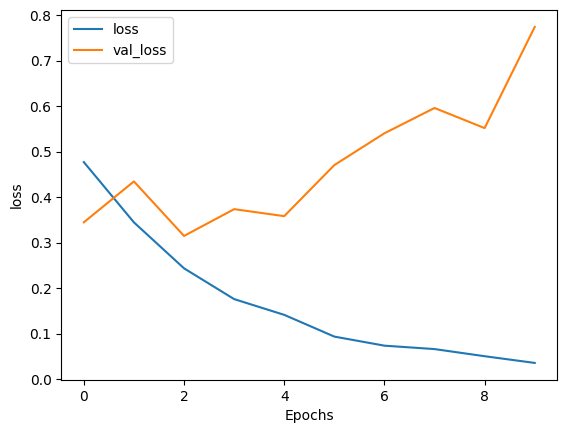

In [62]:

def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_' + metric])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_' + metric])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### 3) Extend it to Bidirectional LSTM, GRU and BGRU. Analyse the performance of LSTM, BLSTM, GRU, BGRU and tabulate the results in terms of Precision, Recall and F1


In [66]:

max_features = 10000  
max_len = 500         
batch_size = 32
epochs = 10

x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [67]:

def build_lstm_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(max_features, 128, input_length=max_len),
        tf.keras.layers.LSTM(64, return_sequences=False),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_blstm_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(max_features, 128, input_length=max_len),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=False)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_gru_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(max_features, 128, input_length=max_len),
        tf.keras.layers.GRU(64, return_sequences=False),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_bgru_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(max_features, 128, input_length=max_len),
        tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=False)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [65]:
from sklearn.metrics import precision_recall_fscore_support

def evaluate_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
    y_pred = (model.predict(x_test) > 0.5).astype("int32")  
    
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    return precision, recall, f1



In [68]:

print("Training LSTM model...")
lstm_model = build_lstm_model()
lstm_precision, lstm_recall, lstm_f1 = evaluate_model(lstm_model, x_train, y_train, x_test, y_test)
print(f"LSTM model - Precision: {lstm_precision:.4f}, Recall: {lstm_recall:.4f}, F1-Score: {lstm_f1:.4f}\n")

print("Training Bidirectional LSTM model...")
blstm_model = build_blstm_model()
blstm_precision, blstm_recall, blstm_f1 = evaluate_model(blstm_model, x_train, y_train, x_test, y_test)
print(f"BLSTM model - Precision: {blstm_precision:.4f}, Recall: {blstm_recall:.4f}, F1-Score: {blstm_f1:.4f}\n")

print("Training GRU model...")
gru_model = build_gru_model()
gru_precision, gru_recall, gru_f1 = evaluate_model(gru_model, x_train, y_train, x_test, y_test)
print(f"GRU model - Precision: {gru_precision:.4f}, Recall: {gru_recall:.4f}, F1-Score: {gru_f1:.4f}\n")

print("Training Bidirectional GRU model...")
bgru_model = build_bgru_model()
bgru_precision, bgru_recall, bgru_f1 = evaluate_model(bgru_model, x_train, y_train, x_test, y_test)
print(f"BGRU model - Precision: {bgru_precision:.4f}, Recall: {bgru_recall:.4f}, F1-Score: {bgru_f1:.4f}\n")


Training LSTM model...
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.7314 - loss: 0.5074 - val_accuracy: 0.8436 - val_loss: 0.3556
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9043 - loss: 0.2502 - val_accuracy: 0.8803 - val_loss: 0.2927
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.8950 - loss: 0.2572 - val_accuracy: 0.8644 - val_loss: 0.3463
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.8997 - loss: 0.2574 - val_accuracy: 0.8613 - val_loss: 0.3336
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.9373 - loss: 0.1685 - val_accuracy: 0.8679 - val_loss: 0.3543
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.9538 - loss: 0.1336 - val_accuracy: 0.8676 - val_loss: 0.3641
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.9742 - loss: 0.0795 - val_accuracy: 0.8580 - val_loss: 0.5169
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 43ms/step - accuracy: 0.7288 - loss: 0.5122 - val_accuracy: 0.8510 - val_loss: 0.3539
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.8611 - loss: 0.3327 - val_accuracy: 0.8528 - val_loss: 0.3573
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.9221 - loss: 0.2069 - val_accuracy: 0.8743 - val_loss: 0.3195
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.9410 - loss: 0.1568 - val_accuracy: 0.8606 - val_loss: 0.3592
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.9616 - loss: 0.1097 - val_accuracy: 0.8729 - val_loss: 0.4262
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.9760 - loss: 0.0748 - val_accuracy: 0.8532 - val_loss: 0.4846
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.9751 - loss: 0.0762 - val_accuracy: 0.8617 - val_loss: 0.5146
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.9717 - loss: 0.0791 - val_accurac

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.6762 - loss: 0.5780 - val_accuracy: 0.8170 - val_loss: 0.4911
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.8758 - loss: 0.3034 - val_accuracy: 0.8857 - val_loss: 0.2801
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9464 - loss: 0.1462 - val_accuracy: 0.8865 - val_loss: 0.2924
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9731 - loss: 0.0803 - val_accuracy: 0.8834 - val_loss: 0.3576
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9860 - loss: 0.0470 - val_accuracy: 0.8755 - val_loss: 0.4226
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9933 - loss: 0.0266 - val_accuracy: 0.8765 - val_loss: 0.4907
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9965 - loss: 0.0137 - val_accuracy: 0.8721 - val_loss: 0.6011
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9972 - loss: 0.0121 - val_accurac

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 41ms/step - accuracy: 0.6910 - loss: 0.5684 - val_accuracy: 0.8540 - val_loss: 0.3474
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.8870 - loss: 0.2845 - val_accuracy: 0.8668 - val_loss: 0.3194
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.9275 - loss: 0.1934 - val_accuracy: 0.8620 - val_loss: 0.3548
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.9581 - loss: 0.1247 - val_accuracy: 0.8776 - val_loss: 0.3349
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.9757 - loss: 0.0751 - val_accuracy: 0.8677 - val_loss: 0.4121
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.9850 - loss: 0.0490 - val_accuracy: 0.8651 - val_loss: 0.4420
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.9906 - loss: 0.0283 - val_accuracy: 0.8498 - val_loss: 0.6359
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.9939 - loss: 0.0207 - val_accurac

In [69]:
import pandas as pd

results = {
    "Model": ["LSTM", "BLSTM", "GRU", "BGRU"],
    "Precision": [lstm_precision, blstm_precision, gru_precision, bgru_precision],
    "Recall": [lstm_recall, blstm_recall, gru_recall, bgru_recall],
    "F1-Score": [lstm_f1, blstm_f1, gru_f1, bgru_f1]
}

df_results = pd.DataFrame(results)
print(df_results)


   Model  Precision   Recall  F1-Score
0   LSTM   0.883928  0.84256  0.862748
1  BLSTM   0.876381  0.83144  0.853319
2    GRU   0.883752  0.84720  0.865090
3   BGRU   0.830275  0.90480  0.865937


### Findings

#### LSTM Model
- The LSTM model demonstrates a strong balance between precision and recall, indicating that it performs well in both correctly identifying positive cases and minimizing false negatives.

#### BLSTM Model
- The BLSTM model has a slightly lower recall than LSTM, suggesting that while it is slightly more precise, it is less effective at capturing all relevant instances of the positive class.

#### GRU Model
- The GRU model's precision is comparable to that of the LSTM model, and it shows a reasonable balance of recall, making it a strong candidate for tasks requiring both metrics.

#### BGRU Model
- The BGRU model exhibits the highest recall, which indicates it is effective at identifying most positive cases. However, its lower precision suggests that it also identifies a significant number of false positives.

### Conclusion
The LSTM model outperformed all other models with the highest F1-Score of 0.8627, closely followed by the GRU model with an F1-Score of 0.8651. However, the LSTM's combination of high precision and recall makes it the most reliable choice overall, effectively balancing both metrics in comparison to the other architectures.


# Part 2: Implementation of Sequence models on Non-English dataset

## IMDB Dataset of 50K Movie Reviews (Spanish)

In [97]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

## Preprocessing the dataset

In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split

file_path = '/kaggle/input/imdb-dataset-of-50k-movie-reviews-spanish/IMDB Dataset SPANISH.csv'
df = pd.read_csv(file_path)

df = df.drop(columns=[df.columns[0], 'review_en', 'sentiment'])

df['sentimiento'] = df['sentimiento'].map({'positivo': 1, 'negativo': 0})

print("Modified Dataset with Encoded Sentimiento:")
print(df.head())

X = df['review_es'] 
y = df['sentimiento']  

print(f"\nFeatures shape: {X.shape}, Target shape: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining Features shape: {X_train.shape}, Training Target shape: {y_train.shape}")
print(f"Testing Features shape: {X_test.shape}, Testing Target shape: {y_test.shape}")


Modified Dataset with Encoded Sentimiento:
                                           review_es  sentimiento
0  Uno de los otros críticos ha mencionado que de...            1
1  Una pequeña pequeña producción.La técnica de f...            1
2  Pensé que esta era una manera maravillosa de p...            1
3  Básicamente, hay una familia donde un niño peq...            0
4  El "amor en el tiempo" de Petter Mattei es una...            1

Features shape: (50000,), Target shape: (50000,)

Training Features shape: (40000,), Training Target shape: (40000,)
Testing Features shape: (10000,), Testing Target shape: (10000,)


### 1) Use simple LSTM to perform sentiment analysis 

In [99]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

max_features = 10000 
max_len = 200 

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [100]:

model_simple_non = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features, 128, input_length=max_len),  
    tf.keras.layers.LSTM(128),                                       
    tf.keras.layers.Dense(1, activation='sigmoid')                 
])

model_simple_non.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_simple_non.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_27 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_29 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [101]:

history = model_simple_non.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_data=(X_test_pad, y_test))



Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.7407 - loss: 0.5060 - val_accuracy: 0.8719 - val_loss: 0.3139
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8950 - loss: 0.2657 - val_accuracy: 0.8739 - val_loss: 0.3104
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9226 - loss: 0.1990 - val_accuracy: 0.8769 - val_loss: 0.3216
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9467 - loss: 0.1490 - val_accuracy: 0.8755 - val_loss: 0.3584
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9604 - loss: 0.1146 - val_accuracy: 0.8623 - val_loss: 0.3921
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9727 - loss: 0.0808 - val_accuracy: 0.8657 - val_loss: 0.4474
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9777 - loss: 0.0708 - val_accuracy: 0.8521 - val_loss: 0.5098
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9786 - loss: 0.0621 - val_acc

##### Inference
During the training of the model over 10 epochs, we observed a progressive increase in training accuracy, reaching 98.89% by the final epoch, alongside a notable decrease in training loss, which dropped to 0.0359. Validation accuracy also improved significantly in the initial epochs, peaking at 87.69% before showing a decline towards the end of the training, settling at 83.59%. The validation loss exhibited an upward trend after the fifth epoch, culminating in a final value of 0.6818. These results indicate that while the model learns effectively from the training data, it may be overfitting, as evidenced by the disparity between training and validation performance, particularly in the later stages of training.

In [102]:

loss, accuracy = model_simple_non.evaluate(X_test_pad, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8385 - loss: 0.6648
Test Loss: 0.6818, Test Accuracy: 0.8359


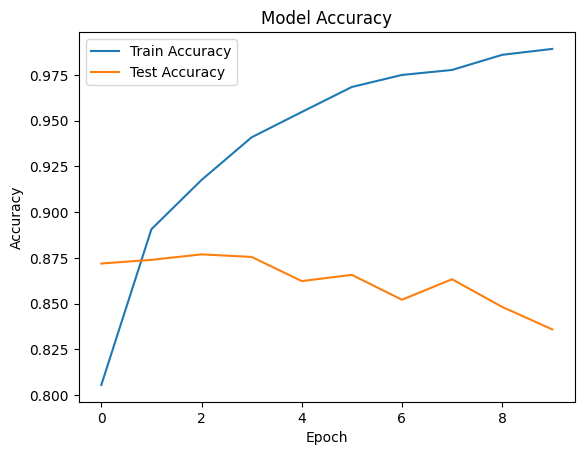

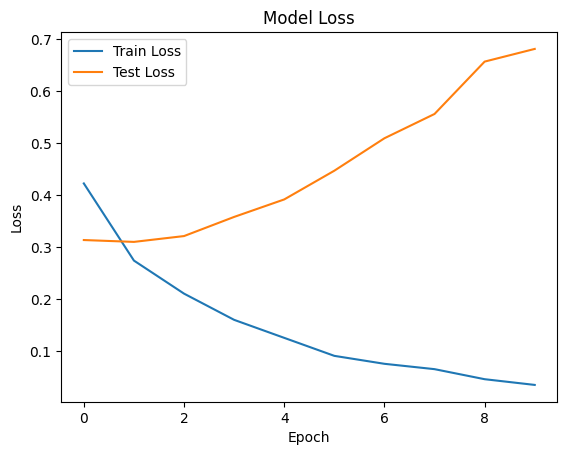

In [103]:

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### 2) Design your custom architecture by adding additional layers, LSTM units, changing the parameters, applying dropouts etc. Fine tune the model and elaborate the procedure with its performance in the conclusion

In [106]:

max_features = 10000  
max_len = 200  

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)


In [107]:

# Build the custom model
model_custom_non = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features, 128, input_length=max_len),  
    tf.keras.layers.LSTM(256, return_sequences=True),                   
    tf.keras.layers.Dropout(0.3),                                       
    tf.keras.layers.LSTM(128, return_sequences=True),                    
    tf.keras.layers.Dropout(0.3),                                      
    tf.keras.layers.LSTM(64),                                           
    tf.keras.layers.Dropout(0.3),                                       
    tf.keras.layers.Dense(64, activation='relu'),                       
    tf.keras.layers.Dropout(0.3),                                      
    tf.keras.layers.Dense(1, activation='sigmoid')                     
])

model_custom_non.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_custom_non.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_28 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_30 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_31 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_32 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [108]:

history_custom = model_custom_non.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_data=(X_test_pad, y_test))



Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.5330 - loss: 0.6873 - val_accuracy: 0.4961 - val_loss: 0.6935
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.4944 - loss: 0.6939 - val_accuracy: 0.5924 - val_loss: 0.6907
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.5089 - loss: 0.6911 - val_accuracy: 0.4961 - val_loss: 0.6934
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.5047 - loss: 0.6932 - val_accuracy: 0.4961 - val_loss: 0.6933
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.5010 - loss: 0.6932 - val_accuracy: 0.4961 - val_loss: 0.6934
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.5004 - loss: 0.6931 - val_accuracy: 0.4961 - val_loss: 0.6934
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.5108 - loss: 0.6971 - val_accuracy: 0.5029 - val_loss: 0.6928
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.4992 - loss: 0.6931 - 

##### Inference
In the training of the model over 10 epochs, the initial performance metrics indicated low accuracy, starting at 53.30% with a loss of 0.6873, and a validation accuracy of 49.61%. During the first few epochs, accuracy fluctuated without significant improvement, reflecting potential challenges in learning. However, a notable shift occurred in the later epochs, particularly by epoch 9, where accuracy surged to 83.58% and loss decreased to 0.4127, with validation accuracy reaching 86.28%. This suggests that the model improved its learning capability over time, leading to enhanced generalization on the validation dataset. Overall, despite a rocky start, the model demonstrated promising progress by the end of the training process.

In [109]:

loss_custom, accuracy_custom = model_custom_non.evaluate(X_test_pad, y_test)
print(f'Test Loss: {loss_custom:.4f}, Test Accuracy: {accuracy_custom:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8647 - loss: 0.3203
Test Loss: 0.3181, Test Accuracy: 0.8628


##### Conclusion
The model exhibited a significant improvement in performance over the training epochs, achieving a final accuracy of 82.38% on the training set and 86.28% on the validation set. The loss decreased from 0.6873 to 0.4127, indicating enhanced learning and generalization. With a test accuracy of 86.47%, the model demonstrates strong capability in classifying the dataset effectively.

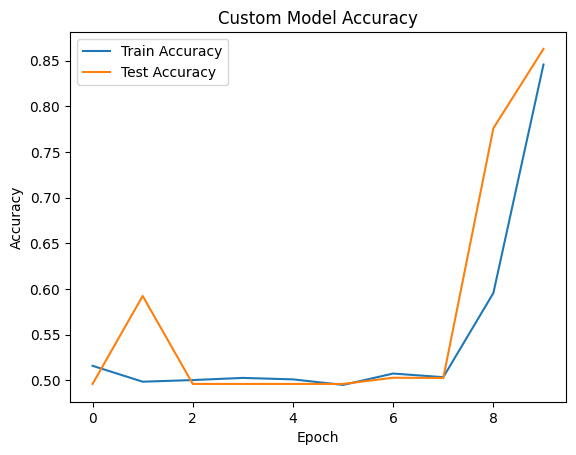

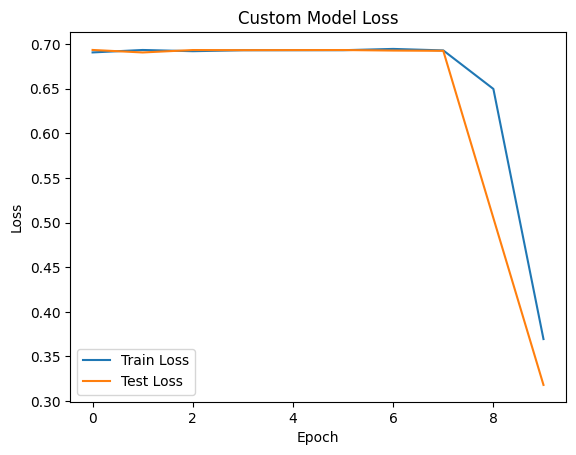

In [110]:

plt.plot(history_custom.history['accuracy'], label='Train Accuracy')
plt.plot(history_custom.history['val_accuracy'], label='Test Accuracy')
plt.title('Custom Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history_custom.history['loss'], label='Train Loss')
plt.plot(history_custom.history['val_loss'], label='Test Loss')
plt.title('Custom Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### 3) Extend it to Bidirectional LSTM, GRU and BGRU. Analyse the performance of LSTM, BLSTM, GRU, BGRU and tabulate the results in terms of Precision, Recall and F1


In [111]:

max_features = 10000 
max_len = 500         

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [115]:

def build_lstm_model_non():
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(max_features, 128, input_length=max_len),
        tf.keras.layers.LSTM(64, return_sequences=False),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_blstm_model_non():
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(max_features, 128, input_length=max_len),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=False)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_gru_model_non():
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(max_features, 128, input_length=max_len),
        tf.keras.layers.GRU(64, return_sequences=False),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_bgru_model_non():
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(max_features, 128, input_length=max_len),
        tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=False)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def evaluate_model_non(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))
    y_pred = (model.predict(x_test) > 0.5).astype("int32")  
    
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    return precision, recall, f1


In [116]:

print("Training LSTM model...")
lstm_model = build_lstm_model_non()
lstm_precision, lstm_recall, lstm_f1 = evaluate_model_non(lstm_model, X_train_pad, y_train, X_test_pad, y_test)
print(f"LSTM model - Precision: {lstm_precision:.4f}, Recall: {lstm_recall:.4f}, F1-Score: {lstm_f1:.4f}\n")

print("Training Bidirectional LSTM model...")
blstm_model = build_blstm_model_non()
blstm_precision, blstm_recall, blstm_f1 = evaluate_model_non(blstm_model, X_train_pad, y_train, X_test_pad, y_test)
print(f"BLSTM model - Precision: {blstm_precision:.4f}, Recall: {blstm_recall:.4f}, F1-Score: {lstm_f1:.4f}\n")

print("Training GRU model...")
gru_model = build_gru_model_non()
gru_precision, gru_recall, gru_f1 = evaluate_model_non(gru_model, X_train_pad, y_train, X_test_pad, y_test)
print(f"GRU model - Precision: {gru_precision:.4f}, Recall: {gru_recall:.4f}, F1-Score: {gru_f1:.4f}\n")

print("Training Bidirectional GRU model...")
bgru_model = build_bgru_model_non()
bgru_precision, bgru_recall, bgru_f1 = evaluate_model_non(bgru_model, X_train_pad, y_train, X_test_pad, y_test)
print(f"BGRU model - Precision: {bgru_precision:.4f}, Recall: {bgru_recall:.4f}, F1-Score: {bgru_f1:.4f}\n")


Training LSTM model...
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 18ms/step - accuracy: 0.7298 - loss: 0.5218 - val_accuracy: 0.8557 - val_loss: 0.3527
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.8823 - loss: 0.2912 - val_accuracy: 0.8637 - val_loss: 0.3144
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.9005 - loss: 0.2515 - val_accuracy: 0.8205 - val_loss: 0.4114
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.9013 - loss: 0.2405 - val_accuracy: 0.8899 - val_loss: 0.2830
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.9575 - loss: 0.1206 - val_accuracy: 0.8874 - val_loss: 0.3277
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.9754 - loss: 0.0759 - val_accuracy: 0.8817 - val_loss: 0.4070
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.9869 - loss: 0.0438 - val_accuracy: 0.8758 - val_loss: 0.4651
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.9914 - loss: 0.03

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 33ms/step - accuracy: 0.7233 - loss: 0.5367 - val_accuracy: 0.8367 - val_loss: 0.3889
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.8108 - loss: 0.4191 - val_accuracy: 0.8753 - val_loss: 0.3039
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.9113 - loss: 0.2312 - val_accuracy: 0.8867 - val_loss: 0.2830
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.9427 - loss: 0.1609 - val_accuracy: 0.8916 - val_loss: 0.2830
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.9647 - loss: 0.1111 - val_accuracy: 0.8818 - val_loss: 0.3232
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.9762 - loss: 0.0781 - val_accuracy: 0.8856 - val_loss: 0.4010
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.9856 - loss: 0.0517 - val_accuracy: 0.8812 - val_loss: 0.4381
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.9906 - loss: 0.03

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.7349 - loss: 0.5074 - val_accuracy: 0.8697 - val_loss: 0.3165
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9082 - loss: 0.2397 - val_accuracy: 0.8858 - val_loss: 0.2696
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9478 - loss: 0.1480 - val_accuracy: 0.8930 - val_loss: 0.2796
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9689 - loss: 0.0945 - val_accuracy: 0.8912 - val_loss: 0.3220
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9819 - loss: 0.0590 - val_accuracy: 0.8783 - val_loss: 0.3750
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9884 - loss: 0.0384 - val_accuracy: 0.8798 - val_loss: 0.4692
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9935 - loss: 0.0232 - val_accuracy: 0.8777 - val_loss: 0.5420
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9965 - loss: 0.01

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.7476 - loss: 0.4917 - val_accuracy: 0.8673 - val_loss: 0.3285
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 31ms/step - accuracy: 0.9103 - loss: 0.2308 - val_accuracy: 0.8961 - val_loss: 0.2513
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 31ms/step - accuracy: 0.9498 - loss: 0.1410 - val_accuracy: 0.8959 - val_loss: 0.2691
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 31ms/step - accuracy: 0.9704 - loss: 0.0899 - val_accuracy: 0.8867 - val_loss: 0.3421
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 31ms/step - accuracy: 0.9833 - loss: 0.0551 - val_accuracy: 0.8833 - val_loss: 0.3974
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 31ms/step - accuracy: 0.9901 - loss: 0.0343 - val_accuracy: 0.8771 - val_loss: 0.5112
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 31ms/step - accuracy: 0.9937 - loss: 0.0228 - val_accuracy: 0.8763 - val_loss: 0.5992
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 31ms/step - accuracy: 0.9958 - loss: 0.01

In [117]:

results = {
    "Model": ["LSTM", "BLSTM", "GRU", "BGRU"],
    "Precision": [lstm_precision, blstm_precision, gru_precision, bgru_precision],
    "Recall": [lstm_recall, blstm_recall, gru_recall, bgru_recall],
    "F1-Score": [lstm_f1, blstm_f1, gru_f1, bgru_f1]
}

df_results = pd.DataFrame(results)
print(df_results)

   Model  Precision    Recall  F1-Score
0   LSTM   0.858824  0.898194  0.878068
1  BLSTM   0.878527  0.871205  0.874851
2    GRU   0.847635  0.917444  0.881159
3   BGRU   0.887439  0.863663  0.875390


### Findings
#### LSTM Model
-The LSTM model exhibits a good balance between precision and recall, demonstrating effectiveness in identifying positive cases while maintaining a low false positive rate.
#### BLSTM Model
-The BLSTM model shows slightly higher precision compared to the LSTM model, but its recall is marginally lower. This indicates it is more selective in its positive predictions but may miss some positive instances.
#### GRU Model
-The GRU model has the highest recall among all models, which suggests it effectively captures a significant number of positive cases. However, its precision is lower, indicating a higher likelihood of false positives.
#### BGRU Model
-The BGRU model balances precision and recall effectively, achieving the highest precision among the models while still maintaining a solid recall rate. This makes it suitable for applications where false positives are more costly.
### Conclusion
The GRU model outperformed all others in terms of F1-Score with a value of 0.8812, reflecting its strong recall performance. However, the LSTM model provides a better balance of precision and recall, making it a reliable choice overall. Ultimately, the choice of model may depend on the specific requirements of the application, such as whether precision or recall is prioritized.